# Several trading strategy with Python
### Students: Antonio Antona, Emanuele Fogliati, Riccardo Iacueo
The project is divided in four parts.
In the first we created a class to import financial data from Binance.com of one or more cryptocurrencies using the site's API, then display the results on the Jupyter notebook and manipulate the data for our purpose.                                       
In the second part we presented a Mean Reverting Trading Strategy (in our case we used Ethereum and Bitcoin, but both can be substituted by other currencies by simply changing the imputs).  

In the third part we run a Classical Linear Regression Model (CLRM) to see if there was any linear relationship between two cryptocurrency (also there we used Ethereum and Bitcoin, but both can be substituted by other currencies) and we also run unit root test to see if there was stationary or at least mean reverting properties on our data sample.

And finally we show another automatic strategy, in this strategy we use the basic principle of trading: Buy low, sell high.
"Buy low, sell high" is a strategy where you buy stocks or securities at a low price and sell them at a higher price.
So at the end,this strategy can be difficult as prices reflect emotions and psychology and are difficult to predict, for that reason we create an automatic strategy, so we delete the emotional part to have more chance to get a profit.

In [1]:
# Import the libraries
import matplotlib as plt
import pyproj_class as bn
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=12,10   #command to set this preimposted size on the graphs
sns.set()
#eliminato le librerie inutili e quelle già nella classe, inserito titoli, aumentato grandezza grafici, importato matplotlib interamente, cambiato capitale iniziale con 0 in modo da mostrare solo profit
#da modificare: parte classe commentata

In [2]:
# here in the first part we used the class 'connection' to import the data and then we crated a datframe with those data
#start_date= 'insert start data as yyyy, mm, dd'
#end_date= 'insert start data as yyyy, mm, dd'
ETHdf = bn.DATA('ETHUSDT','2017-8-17','2019-04-15').connection()
BTCdf = bn.DATA('BTCUSDT','2017-8-17','2019-04-15').connection()
#Creating an empty DataFrame using the index of Bitcoin DataFrame
prices = pd.DataFrame(index=ETHdf.index)
#Adding Etherum column and filling it with values from the ETHdf, same thing for BTC
prices['Ethereum'] = ETHdf['close']
prices['Bitcoin'] = BTCdf['close']
prices.index = prices.index.date
prices = prices.astype(float)
prices.head()

,Ethereum,Bitcoin
2017-08-17,302.00,4285.08
2017-08-18,293.96,4108.37
2017-08-19,290.91,4139.98
2017-08-20,299.10,4086.29
2017-08-21,323.29,4016.00


return of the buy and hold strategy  -0.44625827814569563
return of the Mean Reverting Strategy  -0.7609411993450471


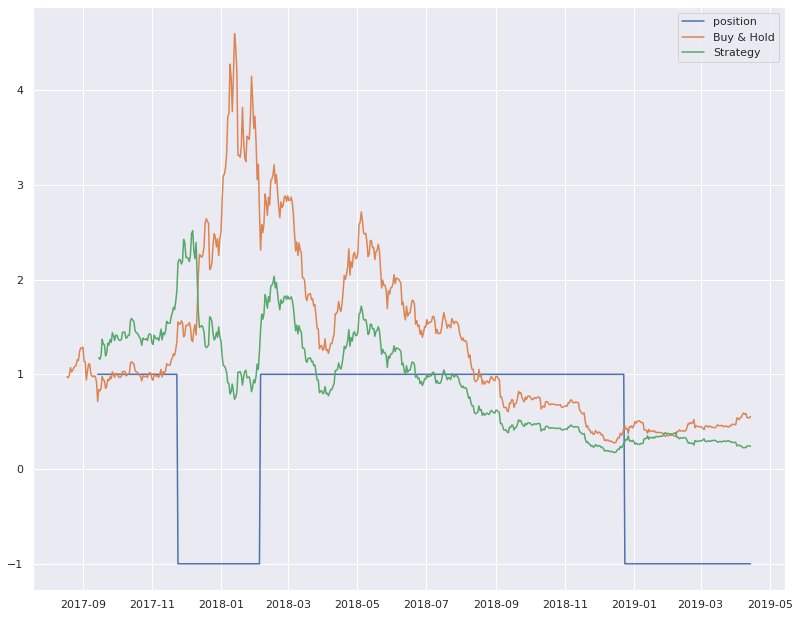

In [3]:
# Create the strategy object
# Generate the strategy
tr = bn.STRATEGY(ETHdf).stra()

return of the buy and hold strategy  0.19748056045628393
return of the Mean Reverting Strategy  1.5351357471012737


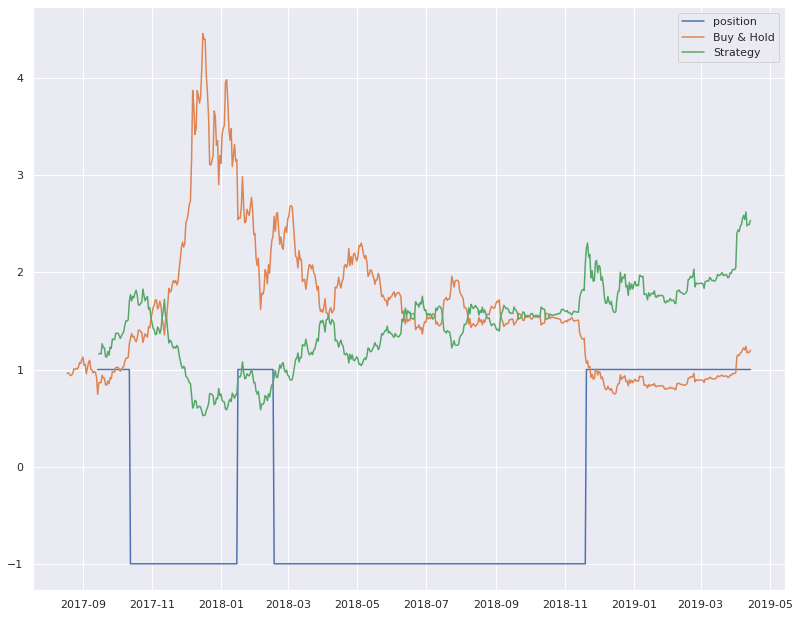

In [4]:
tr = bn.STRATEGY(BTCdf).stra()

# LINEAR REGRESSION AND UNIT ROOT TEST

In [5]:
# Visualizing the data that we want to use in the CLRM

data = pd.DataFrame({'BTC_Price': prices['Bitcoin'], 'ETH_Price': prices['Ethereum']})
data['return_BTC'] = np.log(data['BTC_Price']).diff()
data['return_ETH'] = np.log(data['ETH_Price']).diff()
data['ratio'] = data['return_ETH'] - data['return_BTC']
# removing the first line because it has NaN values
data = data.iloc[1: , :]
data

,BTC_Price,ETH_Price,return_BTC,return_ETH,ratio
2017-08-18,4108.37,293.96,-0.042113,-0.026983,0.015130
2017-08-19,4139.98,290.91,0.007665,-0.010430,-0.018094
2017-08-20,4086.29,299.10,-0.013053,0.027764,0.040818
2017-08-21,4016.00,323.29,-0.017351,0.077772,0.095123
2017-08-22,4040.00,309.80,0.005958,-0.042623,-0.048581
...,...,...,...,...,...
2019-04-10,5308.25,177.12,0.030265,0.014330,-0.015936
2019-04-11,5017.37,164.07,-0.056356,-0.076534,-0.020178
2019-04-12,5048.01,163.19,0.006088,-0.005378,-0.011466
2019-04-13,5045.22,162.99,-0.000553,-0.001226,-0.000673


<AxesSubplot:>

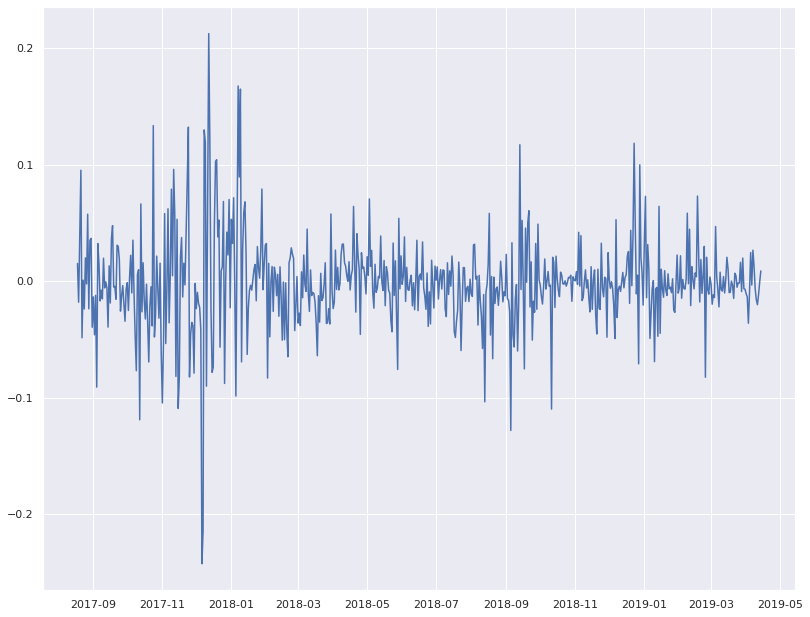

In [6]:
data['ratio'].plot()

## UNIT ROOT TEST
From the previous graph we saw that the ratio of the return between Ethereum and Bitcoin seems to have the stationary feature, in particular the mean seems to have a certain constancy over time. Becouse of that, to confirm or reject our hypothesis we run an ADF test to see if the time series has a unit root, meaning it is non-stationary or the time series does not have a unit root, meaning it is stationary.

In [7]:
r = bn.tests(data['ratio']).adfullertest()

count    605.000000
mean      -0.001275
std        0.039946
min       -0.242442
25%       -0.017753
50%       -0.003012
75%        0.014449
max        0.212311
Name: ratio, dtype: float64

ADF Statistic: -21.901612
p-value: 0.000000
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


Running the example prints the test statistic value of -21,9. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset). 
As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of -21,9 is less than the value of -3.449 at 1%. 
This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). 
Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure. 

## LINEAR REGRESSION
Linear regression relates a continuous response (dependent) variable to one or more predictors (features, independent variables), using the assumption that the relationship is linear in nature:

- The relationship between each feature and the response is a straight line when we keep other features constant.
- The slope of this line does not depend on the values of the other variables.
- The effects of each variable on the response are additive (but we can include new variables that represent the interaction of two variables).  

In other words, the model assumes that the response variable can be explained or predicted by a linear combination of the features, except for random deviations from this linear relationship.

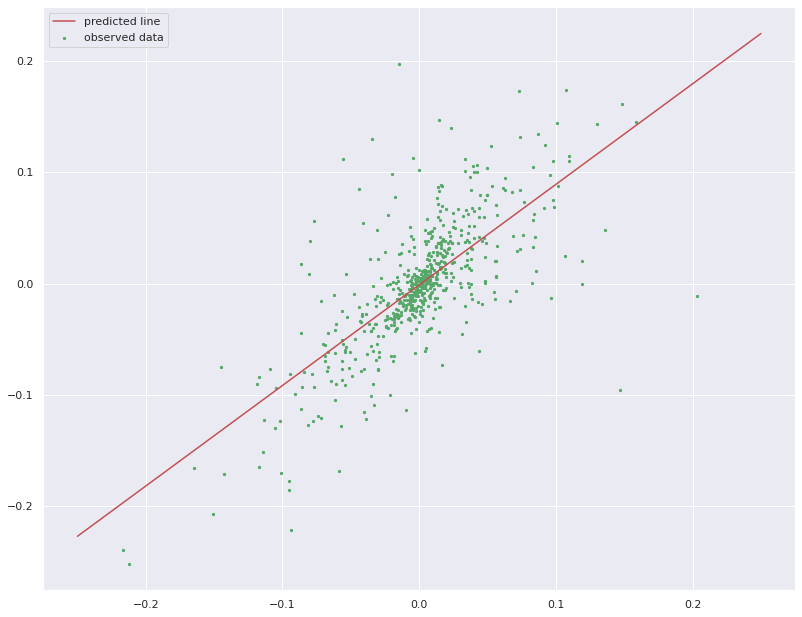

In [8]:
r=bn.CLRM(data['return_BTC'],data['return_ETH']).linreg()

In [9]:
# Here we can see the statistics of our model
r= bn.CLRM(data['return_BTC'],data['return_ETH']).showstats()

                            OLS Regression Results                            
Dep. Variable:             return_BTC   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     644.0
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           3.29e-97
Time:                        09:11:25   Log-Likelihood:                 1232.9
No. Observations:                 605   AIC:                            -2462.
Df Residuals:                     603   BIC:                            -2453.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.001      0.666      0.5

# Buy low,sell High Strategy
The idea behind “buy low, sell high” relates the nature of stock market cycles. Stock prices fluctuate based on many factors: world events, the Treasury interest rate, a company’s growth earnings, the perceived risk of a stock, inflation, the economic strength of the market, and so on.
The price of a stock at any given time is based on the supply and demand at that moment in the market. As the equation changes so does the stock price.

The strategy behind  relys on trying to time the market. Buying low means trying to determine when stocks have hit bottom price and purchasing shares in the hope of them going up. Conversely, selling high relies on figuring out when the market has hit its peak. Once stocks have hit their maximum value, investors sell their shares and reap the rewards.

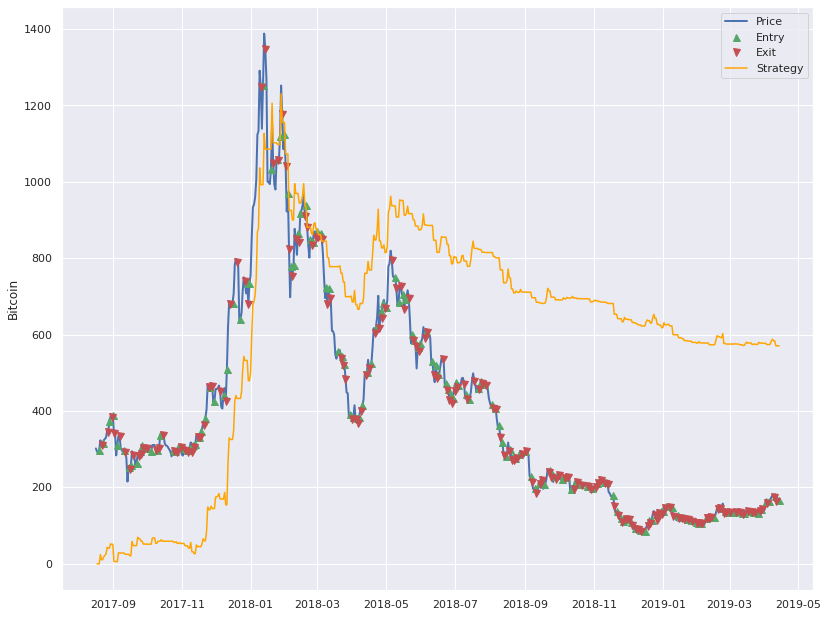

In [10]:
#Chart where is possible to see the final profit.

tr2 = bn.Anotherstrategy(ETHdf).stra2()